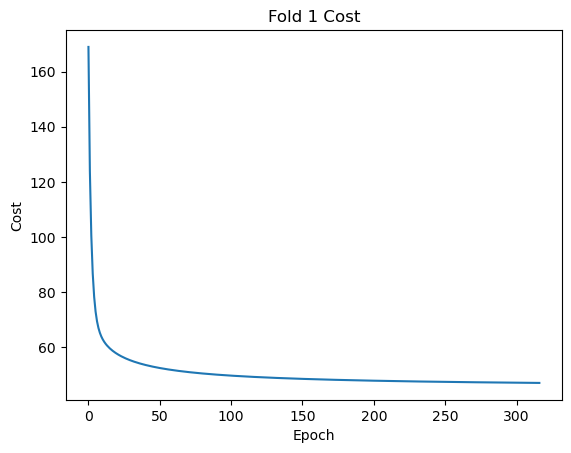

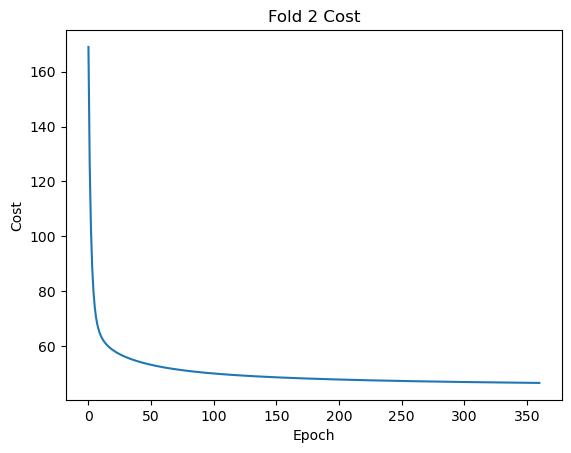

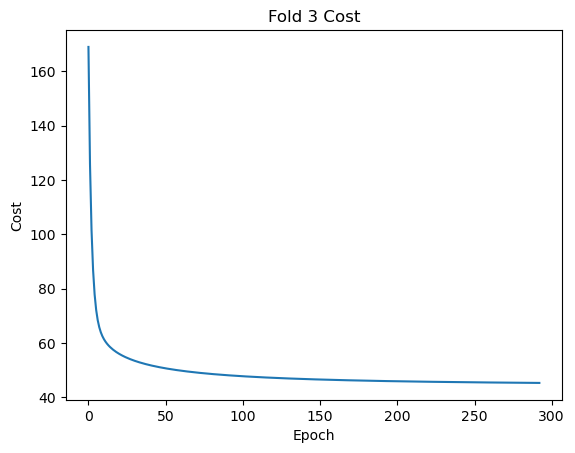

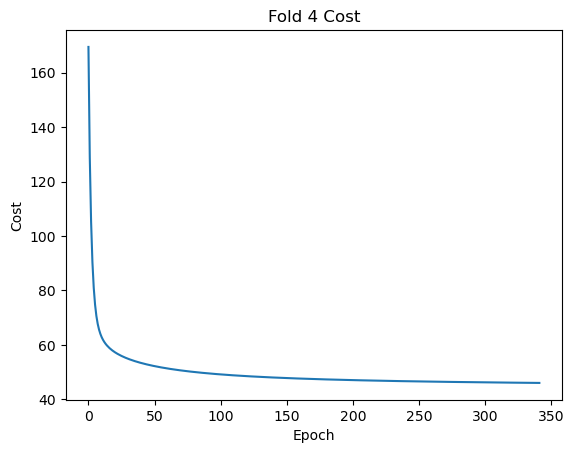

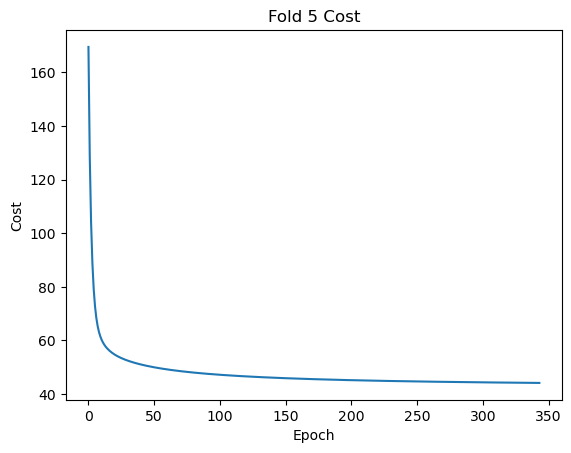

Average number of iterations before convergence: [317, 361, 293, 342, 344]
Average accuracy across all folds: 0.8439775910364146


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Read the data from the CSV file
data = pd.read_csv("vectors.csv")
ls = []
for i in range(0,101):
    ls.append(str(i))
data.columns = ls

# Preprocess the data
bl = data[data.iloc[:, 0].isin([1, 2])]
target_bl = bl.iloc[:, 0]
features_bl = bl.iloc[:, 1:]
target_bl = target_bl.map({1: -1, 2: 1})

# Adaline parameters
learning_rate = 0.0001
epochs = 1000

# Adaline training function
def activation_function(X, weights):
    return np.dot(X, weights[1:]) + weights[0]

def predict(instance, weights):
    output = activation_function(instance, weights)
    return np.where(output >= 0.0, 1, -1)

# Prepare for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
iteration_counts = []
accuracy_scores = []

fold = 1
for train_index, test_index in kf.split(features_bl):
    # Split the data
    X_train, X_test = features_bl.iloc[train_index], features_bl.iloc[test_index]
    y_train, y_test = target_bl.iloc[train_index], target_bl.iloc[test_index]

    # Standardize the features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Initialize weights
    weights = np.zeros(1 + X_train.shape[1])
    cost = []

    # Training
    for _ in range(epochs):
        output = activation_function(X_train, weights)
        errors = (y_train - output)
        weights[1:] += learning_rate * X_train.T.dot(errors)
        weights[0] += learning_rate * errors.sum()
        cost_epoch = (errors**2).sum() / 2.0
        cost.append(cost_epoch)
        # Stop training if cost is not improving
        if len(cost) > 2 and np.isclose(cost[-2], cost[-1], rtol=1e-4):
            break

    iteration_counts.append(len(cost))
    
    # Plot cost for this fold
    plt.figure()
    plt.plot(cost)
    plt.title(f'Fold {fold} Cost')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.show()
    
    fold += 1
    
    # Predict the labels for the test set
    y_pred = predict(X_test, weights)

    # Calculate the accuracy of the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print("Average number of iterations before convergence:", iteration_counts)
print("Average accuracy across all folds:", np.mean(accuracy_scores))


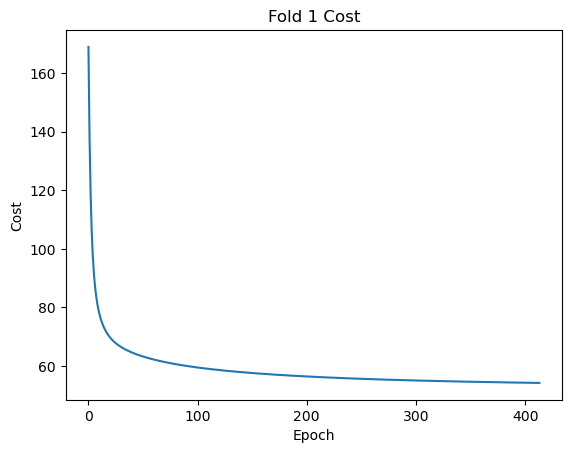

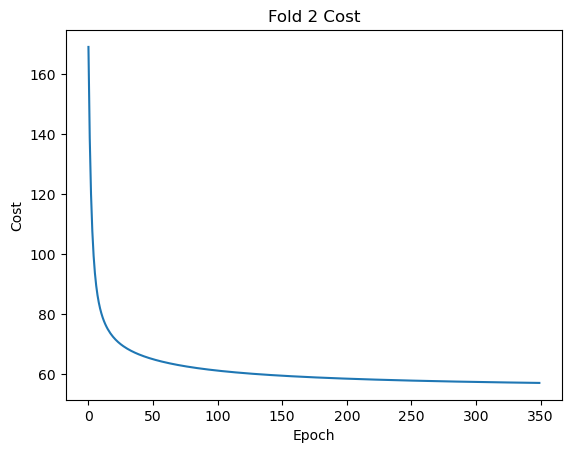

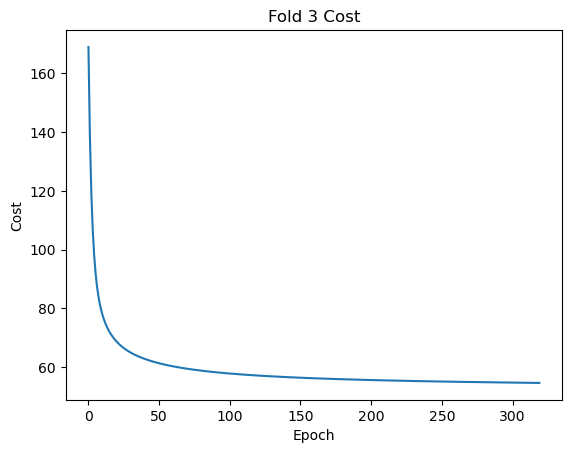

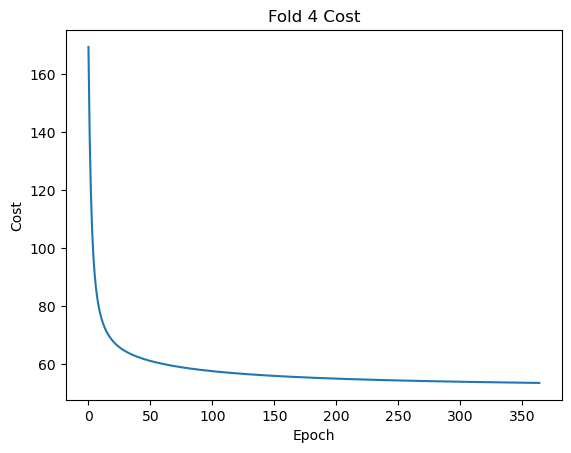

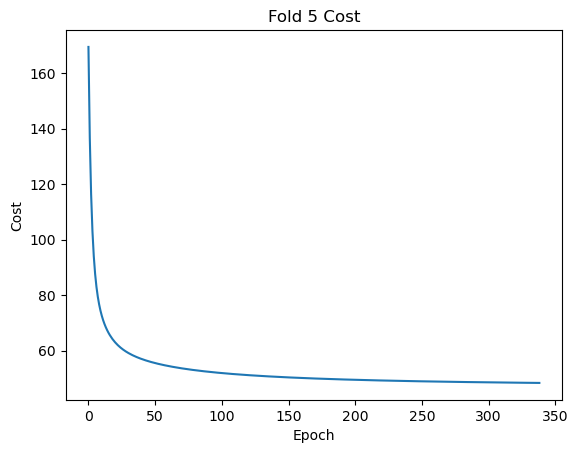

Average number of iterations before convergence: 357.6
Average accuracy across all folds: 0.8201960784313727


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Read the data from the CSV file
data = pd.read_csv("vectors.csv")
ls = []
for i in range(0,101):
    ls.append(str(i))
data.columns = ls

# Preprocess the data
bm = data[data.iloc[:, 0].isin([1, 3])]
target_bm = bm.iloc[:, 0]
features_bm = bm.iloc[:, 1:]
target_bm = target_bm.map({1: -1, 3: 1})

# Adaline parameters
learning_rate = 0.0001
epochs = 1000

# Adaline training function
def activation_function(X, weights):
    return np.dot(X, weights[1:]) + weights[0]

def predict(instance, weights):
    output = activation_function(instance, weights)
    return np.where(output >= 0.0, 1, -1)

# Prepare for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
iteration_counts = []
accuracy_scores = []

fold = 1
for train_index, test_index in kf.split(features_bm):
    # Split the data
    X_train, X_test = features_bm.iloc[train_index], features_bm.iloc[test_index]
    y_train, y_test = target_bm.iloc[train_index], target_bm.iloc[test_index]

    # Standardize the features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Initialize weights
    weights = np.zeros(1 + X_train.shape[1])
    cost = []

    # Training
    for _ in range(epochs):
        output = activation_function(X_train, weights)
        errors = (y_train - output)
        weights[1:] += learning_rate * X_train.T.dot(errors)
        weights[0] += learning_rate * errors.sum()
        cost_epoch = (errors**2).sum() / 2.0
        cost.append(cost_epoch)
        # Stop training if cost is not improving
        if len(cost) > 2 and np.isclose(cost[-2], cost[-1], rtol=1e-4):
            break

    iteration_counts.append(len(cost))
    
    # Plot cost for this fold
    plt.figure()
    plt.plot(cost)
    plt.title(f'Fold {fold} Cost')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.show()
    
    fold += 1
    
    # Predict the labels for the test set
    y_pred = predict(X_test, weights)

    # Calculate the accuracy of the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print("Average number of iterations before convergence:", np.mean(iteration_counts))
print("Average accuracy across all folds:", np.mean(accuracy_scores))


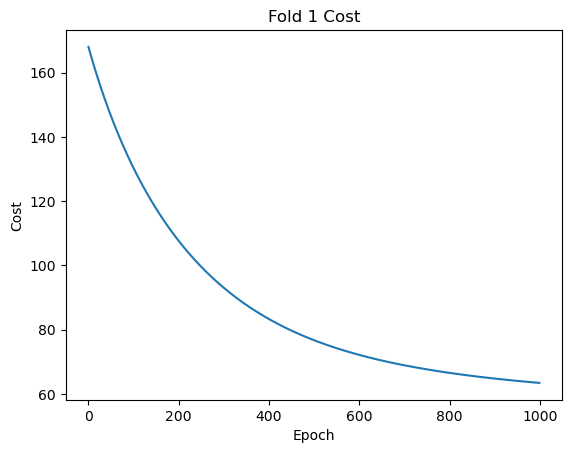

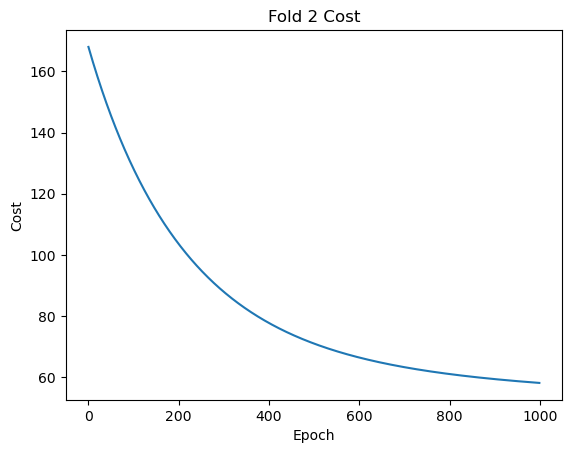

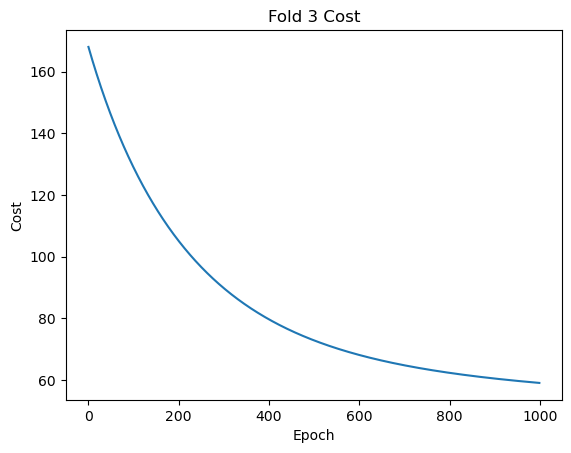

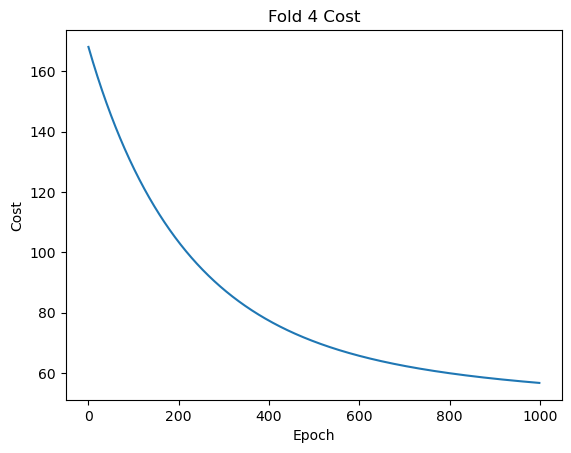

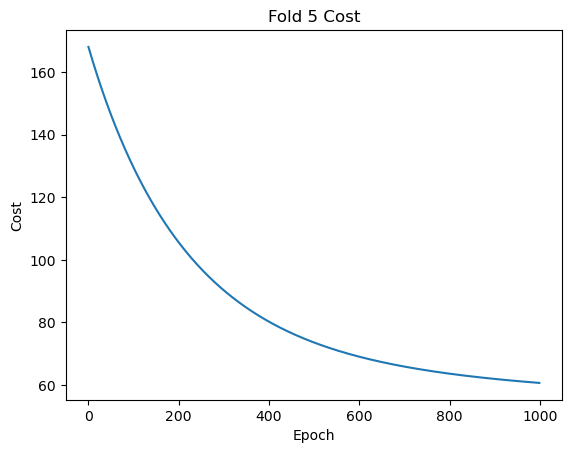

Average number of iterations before convergence: 1000.0
Average accuracy across all folds: 0.8761904761904763


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler

# Read the data from the CSV file
data = pd.read_csv("vectors.csv")
ls = []
for i in range(0,101):
    ls.append(str(i))
data.columns = ls

# Preprocess the data
lm = data[data.iloc[:, 0].isin([2, 3])]
target_lm = lm.iloc[:, 0]
features_lm = lm.iloc[:, 1:]
target_lm = target_lm.map({2: -1, 3: 1})

# Adaline parameters
learning_rate = 0.000001
epochs = 1000

# Adaline training function
def activation_function(X, weights):
    return np.dot(X, weights[1:]) + weights[0]

def predict(instance, weights):
    output = activation_function(instance, weights)
    return np.where(output >= 0.0, 1, -1)

# Prepare for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
iteration_counts = []
accuracy_scores = []

fold = 1
for train_index, test_index in kf.split(features_lm):
    # Split the data
    X_train, X_test = features_lm.iloc[train_index], features_lm.iloc[test_index]
    y_train, y_test = target_lm.iloc[train_index], target_lm.iloc[test_index]

    # Standardize the features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Initialize weights
    weights = np.zeros(1 + X_train.shape[1])
    cost = []

    # Training
    for _ in range(epochs):
        output = activation_function(X_train, weights)
        errors = (y_train - output)
        weights[1:] += learning_rate * X_train.T.dot(errors)
        weights[0] += learning_rate * errors.sum()
        cost_epoch = (errors**2).sum() / 2.0
        cost.append(cost_epoch)
        # Stop training if cost is not improving
        if len(cost) > 2 and np.isclose(cost[-2], cost[-1], rtol=1e-4):
            break

    iteration_counts.append(len(cost))
    
    # Plot cost for this fold
    plt.figure()
    plt.plot(cost)
    plt.title(f'Fold {fold} Cost')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.show()
    
    fold += 1
    
    # Predict the labels for the test set
    y_pred = predict(X_test, weights)

    # Calculate the accuracy of the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

print("Average number of iterations before convergence:", np.mean(iteration_counts))
print("Average accuracy across all folds:", np.mean(accuracy_scores))
